In [ ]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

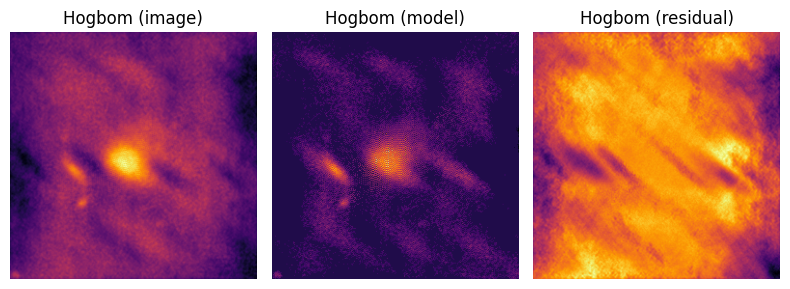

In [ ]:
from src.preprocess.imager import Imager
from src.utils.plot import plot_image

image = 'img_0000'
image_folder = ROOT / 'data/processed' / image
ms_folder = image_folder / 'sim1'
ms_path = ms_folder / 'visibilities.ms'

imager = Imager(vis = str(ms_path), output_path=ms_folder)

niter_hogbom = 40000
tclean_config = {
    'imsize': 256,
    'cell': '0.02arcsec',
    'niter': niter_hogbom,
    'weighting': 'natural',
}

imager.tclean_hogbom(config=tclean_config)

image_path = ROOT / 'data/processed' / image / 'sim1' / f'tclean_hogbom_{niter_hogbom}'
plot_image(image_path=str(image_path), title='Hogbom')

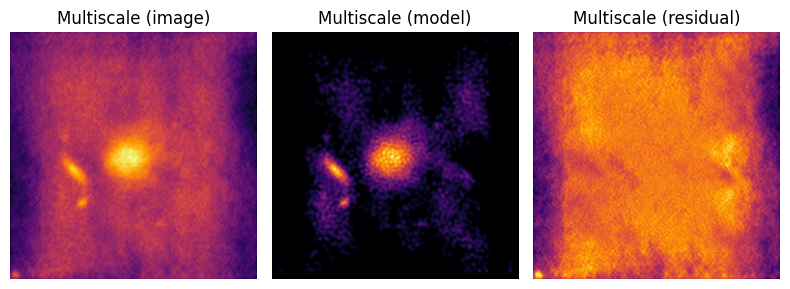

In [15]:
niter = 2500
tclean_multiscale_config = {
    'imsize': 256,
    'cell': '0.02arcsec',
    'niter': niter,
    'weighting': 'natural',
    'scales': [0,5,100],
}
imager.tclean_multiscale(config=tclean_multiscale_config)
image_path = ROOT / 'data/processed' / image / 'sim1' / f'tclean_multiscale_{niter}'
plot_image(image_path=str(image_path), title='Multiscale')

In [169]:
# gpuvmem_config = {
#     '': 0,
# }
# imager.gpuvmem(config=gpuvmem_config)

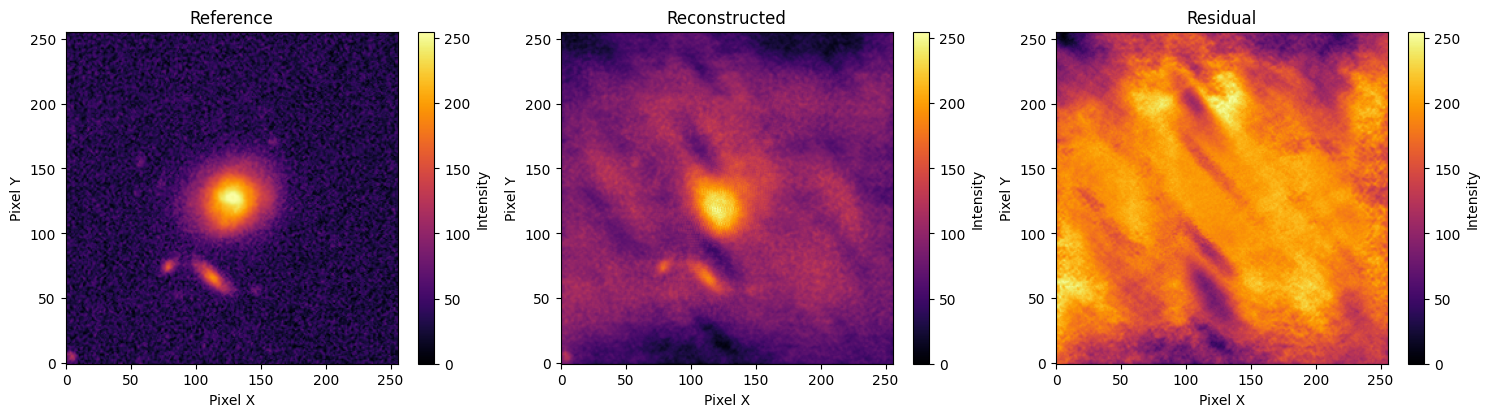

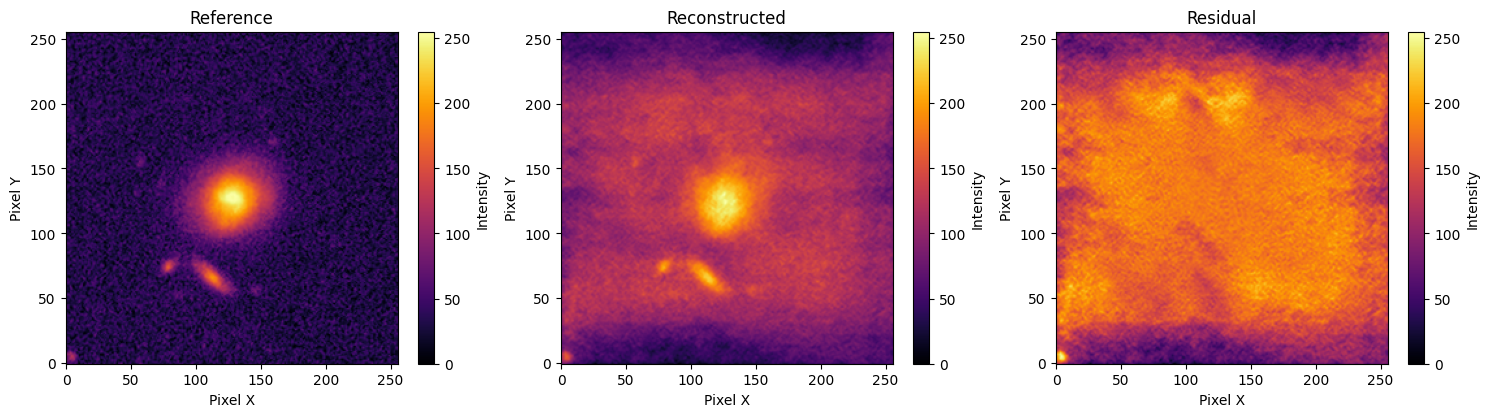

In [21]:
# Calculate image quality metrics of the dirty image
from src.preprocess.image_quality_metrics import ImageQualityMetrics

reference_path = ROOT / 'data/processed' / image / 'groundtruth.fits'

image_path = ROOT / 'data/processed' / image / 'sim1' / f'tclean_hogbom_{niter_hogbom}' / f'tclean_hogbom_{niter_hogbom}.image'
residual_path = ROOT / 'data/processed' / image / 'sim1' / f'tclean_hogbom_{niter_hogbom}' / f'tclean_hogbom_{niter_hogbom}.residual'
iqm = ImageQualityMetrics(
    image_path=str(image_path), 
    residual_path=str(residual_path), 
    reference_path=str(reference_path)
)
iqm.plot_images()

multiscale_image_path = ROOT / 'data/processed' / image / 'sim1' / f'tclean_multiscale_{niter}' / f'tclean_multiscale_{niter}.image'
multiscale_residual_path = ROOT / 'data/processed' / image / 'sim1' / f'tclean_multiscale_{niter}' / f'tclean_multiscale_{niter}.residual'
iqm_multiscale = ImageQualityMetrics(
    image_path=str(multiscale_image_path), 
    residual_path=str(multiscale_residual_path), 
    reference_path=str(reference_path)
)
iqm_multiscale.plot_images()


In [22]:
snr = iqm.snr()
ssim = iqm.ssim()
psnr_no_reference = iqm.psnr_no_reference()
psnr_reference = iqm.psnr_reference()

peak = iqm.peak()
rms = iqm.rms()


print("Image Quality Metrics for Hogbom:")
print(f'SNR: {snr}')
print(f'SSIM: {ssim}')
print(f'PSNR (no reference): {psnr_no_reference}')
print(f'PSNR (reference): {psnr_reference}')
print(f'Peak: {peak}')
print(f'RMS: {rms}')

print("\nImage Quality Metrics for Multiscale:")
snr_multiscale = iqm_multiscale.snr()
ssim_multiscale = iqm_multiscale.ssim()
psnr_no_reference_multiscale = iqm_multiscale.psnr_no_reference()
psnr_reference_multiscale = iqm_multiscale.psnr_reference()
peak_multiscale = iqm_multiscale.peak()
rms_multiscale = iqm_multiscale.rms()

print(f'SNR: {snr_multiscale}')
print(f'SSIM: {ssim_multiscale}')
print(f'PSNR (no reference): {psnr_no_reference_multiscale}')
print(f'PSNR (reference): {psnr_reference_multiscale}')
print(f'Peak: {peak_multiscale}')
print(f'RMS: {rms_multiscale}')

Image Quality Metrics for Hogbom:
SNR: 4.8687697558238066
SSIM: 0.4895621673993552
PSNR (no reference): 1.4833282563347732
PSNR (reference): 13.613603061550306
Peak: 255.0
RMS: 171.91070075745972

Image Quality Metrics for Multiscale:
SNR: 3.915633040689817
SSIM: 0.4576551707989225
PSNR (no reference): 1.6176175814382663
PSNR (reference): 11.070399841112504
Peak: 255.0
RMS: 157.6392361988988
